In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import cv2

In [5]:
import os

In [6]:
from os import listdir

In [7]:
from sklearn.preprocessing import LabelBinarizer

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
from tensorflow.keras.layers import BatchNormalization

In [10]:
from tensorflow.keras.layers import Conv2D

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

In [13]:
from tensorflow.keras import backend as K

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.keras.optimizers import Adam

In [16]:
from tensorflow.keras.preprocessing import image

In [17]:
from tensorflow.keras.preprocessing.image import img_to_array

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
import matplotlib.pyplot as plt

In [21]:
EPOCHS = 1

In [22]:
INIT_LR = 1e-3

In [23]:
BS = 32

In [24]:
default_image_size = tuple((256, 256))

In [25]:
image_size = 0

In [26]:
directory_root = 'Dataset/'

In [27]:
width=256

In [28]:
height=256

In [29]:
depth=3

In [30]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [31]:
image_list, label_list = [], []
eda_data = []
disease_type = []

In [32]:

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)
        for idx, plant_disease_folder  in enumerate(plant_disease_folder_list):
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)
            for image in plant_disease_image_list[:100]:
                disease_type.append(plant_disease_folder)
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    eda_data.append([image_directory, idx, plant_disease_folder])
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Tomato_Late_blight ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Tomato__Target_Spot ...
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Processing Tomato__Tomato_YellowLeaf__Curl_Virus ...
[INFO] Image loading completed


In [33]:
df = pd.DataFrame(eda_data, columns=['File', 'DiseaseID','Disease Type'])

In [34]:
df.head()

,File,DiseaseID,Disease Type
0,Dataset//PlantVillage/Pepper__bell___Bacterial...,0,Pepper__bell___Bacterial_spot
1,Dataset//PlantVillage/Pepper__bell___Bacterial...,0,Pepper__bell___Bacterial_spot
2,Dataset//PlantVillage/Pepper__bell___Bacterial...,0,Pepper__bell___Bacterial_spot
3,Dataset//PlantVillage/Pepper__bell___Bacterial...,0,Pepper__bell___Bacterial_spot
4,Dataset//PlantVillage/Pepper__bell___Bacterial...,0,Pepper__bell___Bacterial_spot


In [35]:
df.tail()

,File,DiseaseID,Disease Type
1495,Dataset//PlantVillage/Tomato__Tomato_YellowLea...,14,Tomato__Tomato_YellowLeaf__Curl_Virus
1496,Dataset//PlantVillage/Tomato__Tomato_YellowLea...,14,Tomato__Tomato_YellowLeaf__Curl_Virus
1497,Dataset//PlantVillage/Tomato__Tomato_YellowLea...,14,Tomato__Tomato_YellowLeaf__Curl_Virus
1498,Dataset//PlantVillage/Tomato__Tomato_YellowLea...,14,Tomato__Tomato_YellowLeaf__Curl_Virus
1499,Dataset//PlantVillage/Tomato__Tomato_YellowLea...,14,Tomato__Tomato_YellowLeaf__Curl_Virus


In [36]:
df.sample(10)

,File,DiseaseID,Disease Type
663,Dataset//PlantVillage/Tomato_Early_blight/0f7a...,6,Tomato_Early_blight
183,Dataset//PlantVillage/Pepper__bell___healthy/1...,1,Pepper__bell___healthy
1314,Dataset//PlantVillage/Tomato__Tomato_mosaic_vi...,13,Tomato__Tomato_mosaic_virus
558,Dataset//PlantVillage/Tomato_Bacterial_spot/07...,5,Tomato_Bacterial_spot
984,Dataset//PlantVillage/Tomato_Leaf_Mold/17ea393...,9,Tomato_Leaf_Mold
330,Dataset//PlantVillage/Potato___healthy/31a09d3...,3,Potato___healthy
136,Dataset//PlantVillage/Pepper__bell___healthy/0...,1,Pepper__bell___healthy
35,Dataset//PlantVillage/Pepper__bell___Bacterial...,0,Pepper__bell___Bacterial_spot
368,Dataset//PlantVillage/Potato___healthy/683b04a...,3,Potato___healthy
655,Dataset//PlantVillage/Tomato_Early_blight/0ecc...,6,Tomato_Early_blight


In [37]:
def disease_type(disease_type, rows, cols):
    fig,ax = plt.subplots(rows, cols, figsize=(12,12))
    disease_type = df['File'][df['Disease Type'] == disease_type].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join("", disease_type[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1

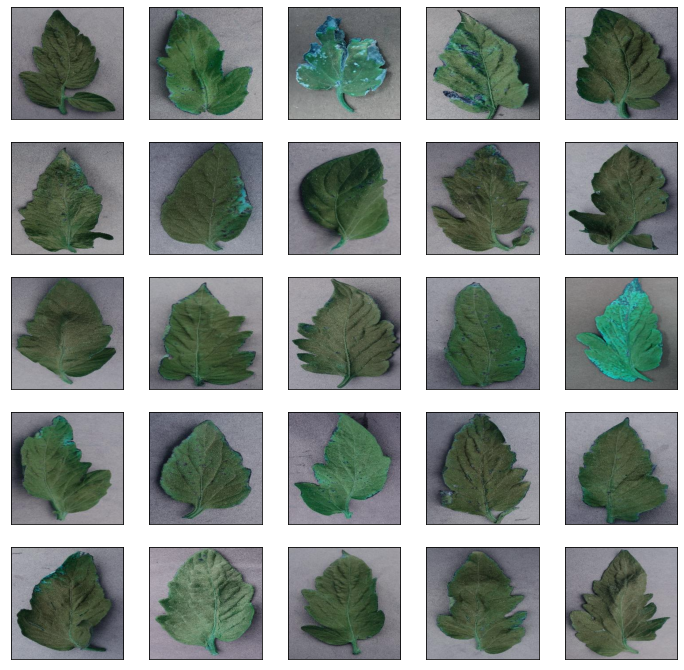

In [38]:
disease_type('Tomato_Bacterial_spot', 5, 5)

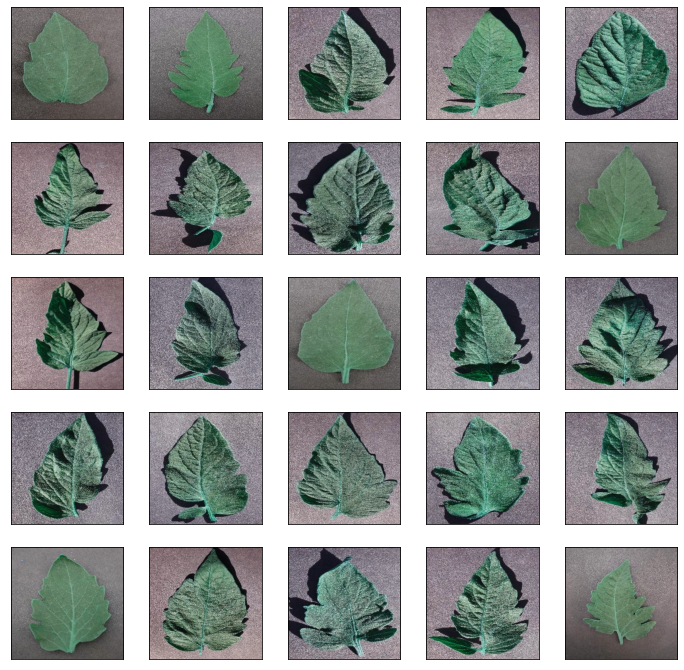

In [39]:
disease_type('Tomato_healthy', 5, 5) 

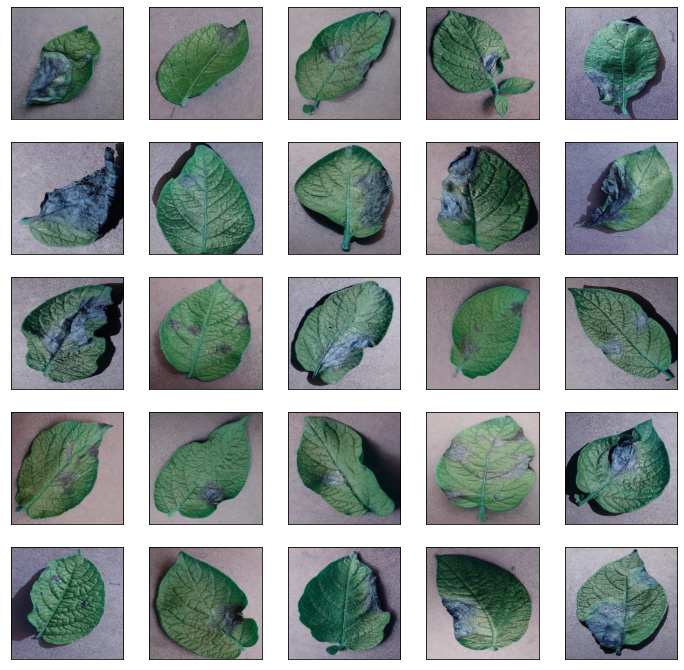

In [40]:
disease_type('Potato___Late_blight', 5, 5) 

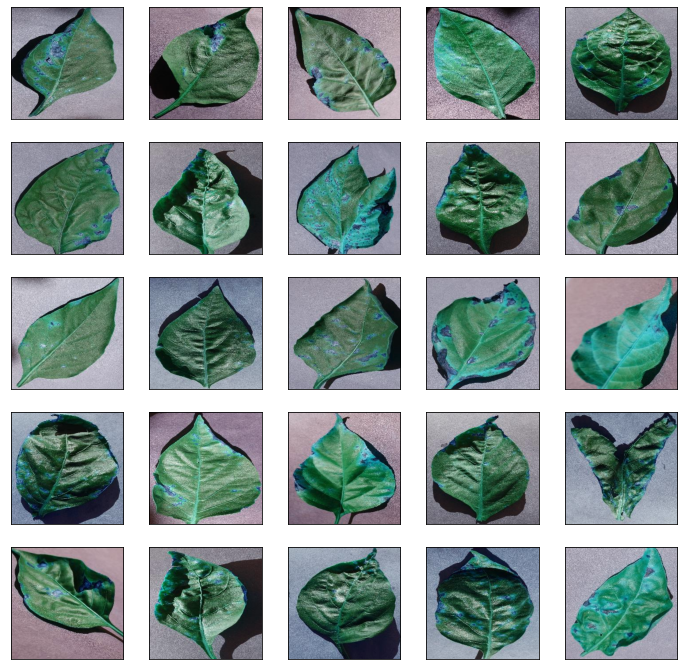

In [41]:
disease_type('Pepper__bell___Bacterial_spot', 5, 5) 

In [43]:
image_size = len(image_list)
print(image_size)

1500


In [44]:
label_binarizer = LabelBinarizer()

In [45]:
image_labels = label_binarizer.fit_transform(label_list)

In [46]:
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))

In [47]:
n_classes = len(label_binarizer.classes_)

In [48]:
print(label_binarizer.classes_)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [49]:
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

In [50]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [51]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [52]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1

In [53]:
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

In [54]:
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))

In [55]:
model.add(Activation("relu"))

In [56]:
model.add(BatchNormalization(axis=chanDim))

In [57]:
model.add(MaxPooling2D(pool_size=(3, 3)))

In [58]:
model.add(Dropout(0.25))

In [59]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [60]:
model.add(Activation("relu"))

In [61]:
model.add(BatchNormalization(axis=chanDim))

In [62]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [63]:
model.add(Activation("relu"))

In [64]:
model.add(BatchNormalization(axis=chanDim))

In [65]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [66]:
model.add(Dropout(0.25))

In [67]:
model.add(Conv2D(128, (3, 3), padding="same"))

In [68]:
model.add(Activation("relu"))

In [69]:
model.add(BatchNormalization(axis=chanDim))

In [70]:
model.add(Conv2D(128, (3, 3), padding="same"))

In [71]:
model.add(Activation("relu"))

In [72]:
model.add(BatchNormalization(axis=chanDim))

In [73]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [74]:
model.add(Dropout(0.25))

In [75]:
model.add(Flatten())

In [76]:
model.add(Dense(1024))

In [77]:
model.add(Activation("relu"))

In [78]:
model.add(BatchNormalization())

In [79]:
model.add(Dropout(0.5))

In [80]:
model.add(Dense(n_classes))

In [81]:
model.add(Activation("softmax"))

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 85, 85, 64)        0

In [83]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [84]:
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [85]:
print("[INFO] training network...")

[INFO] training network...


In [86]:
history = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

  ...
    to  
  ['...']
Train for 37 steps, validate on 300 samples
37/37 [==============================] - 196s 5s/step - loss: 0.2360 - accuracy: 0.9297 - val_loss: 0.9474 - val_accuracy: 0.8733


In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

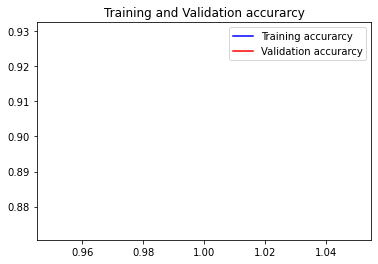

In [88]:
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()


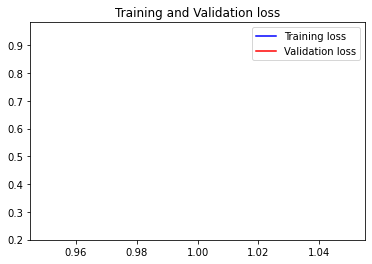

In [89]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [90]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
300/300 [==============================] - 5s 17ms/sample - loss: 0.9474 - accuracy: 0.8733
Test Accuracy: 87.33333349227905
